
# Project: Wrangling Twitter WeRateDogs Dataset

## GATHER

In [214]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [215]:
# Read the csv with Twitter data
df = pd.read_csv('twitter-archive-enhanced.csv')

In [216]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [217]:
# Open the url with predictive model
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
open(url.split('/')[-1], mode='wb').write(r.content);

# load predicive model into DataFrame
df_img = pd.read_csv(url.split('/')[-1], sep='\t')



In [218]:
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
# Gather data form the Twitter API

consumer_key = 'ENTER'
consumer_secret = 'ENTER'
access_token = 'ENTER'
access_secret = 'ENTER'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [9]:
tweet_id_list = list(df['tweet_id'])
error_tweet_id = []
with open('tweet_json.txt', 'a') as file:
    for tweet_id in tweet_id_list:
        try:
            tweet = api.get_status(tweet_id, tweet_mode = 'extended')
            json.dump( tweet._json, file)              #otro ocupó status
            file.write('\n')
           
        except:
            error_tweet_id.append(tweet_id)

Rate limit reached. Sleeping for: 275
Rate limit reached. Sleeping for: 279


In [221]:
tweets_list = []
with open('tweet_json.txt') as file:
    for tweet_id in tweet_id_list:  
        if tweet_id not in error_tweet_id:
            tweets_list.append(file.readline())

In [222]:
count_list = []
for i in tweets_list:
    tweet_id = json.loads(i)['id']
    retweet_count = json.loads(i)['retweet_count']
    favourite_count = json.loads(i)['favorite_count']
    count_list.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favourite_count': favourite_count})

tweet_counts = pd.DataFrame(count_list, columns = ['tweet_id', 'retweet_count', 'favourite_count'])

In [223]:
tweet_counts.head()

,tweet_id,retweet_count,favourite_count
0,892420643555336193,7370,35046
1,892177421306343426,5493,30347
2,891815181378084864,3631,22808
3,891689557279858688,7548,38318
4,891327558926688256,8136,36548


In [16]:
#df_2 = pd.read_fwf('tweet_json.txt',header=None)
#df_2.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,"{""created_at"":","""Tue",Aug,1,16:23:56,0,"2017"",","""id"":","892420643555336193,","""id_str"":",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"{""created_at"":","""Tue",Aug,1,00:17:27,0,"2017"",","""id"":","892177421306343426,","""id_str"":",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"{""created_at"":","""Mon",Jul,31,00:18:03,0,"2017"",","""id"":","891815181378084864,","""id_str"":",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{""created_at"":","""Sun",Jul,30,15:58:51,0,"2017"",","""id"":","891689557279858688,","""id_str"":",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{""created_at"":","""Sat",Jul,29,16:00:24,0,"2017"",","""id"":","891327558926688256,","""id_str"":",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## ASSESS

### Twitter archive Programmating assessment

In [224]:
#I need to see the whole text of the tweet to check for quality issues
pd.set_option('display.max_colwidth', None)
df.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [225]:
df.tail(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2306,666835007768551424,NaN,NaN,2015-11-18 04:27:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",These are Peruvian Feldspars. Their names are Cupit and Prencer. Both resemble Rand Paul. Sick outfits 10/10 &amp; 10/10 https://t.co/ZnEMHBsAs1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666835007768551424/photo/1,10,10,None,None,None,None,None
2307,666826780179869698,NaN,NaN,2015-11-18 03:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",12/10 simply brilliant pup https://t.co/V6ZzG45zzG,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666826780179869698/photo/1,12,10,None,None,None,None,None
2308,666817836334096384,NaN,NaN,2015-11-18 03:18:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jeph. He is a German Boston Shuttlecock. Enjoys couch. Lost body during French Revolution. True hero 9/10 https://t.co/8whlkYw3mO,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666817836334096384/photo/1,9,10,Jeph,None,None,None,None
2309,666804364988780544,NaN,NaN,2015-11-18 02:25:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jockson. He is a Pinnacle Sagittarius. Fancy bandana. Enjoys lightly sucking on hot dog in nature. 8/10 https://t.co/RdKbAOEpDK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666804364988780544/photo/1,8,10,Jockson,None,None,None,None
2310,666786068205871104,NaN,NaN,2015-11-18 01:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Unfamiliar with this breed. Ears pointy af. Won't let go of seashell. Won't eat kibble. Not very fast. Bad dog 2/10 https://t.co/EIn5kElY1S,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666786068205871104/photo/1,2,10,None,None,None,None,None
2311,666781792255496192,NaN,NaN,2015-11-18 00:55:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Bacardi named Octaviath. Can shoot spaghetti out of mouth. 10/10 https://t.co/uEvsGLOFHa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666781792255496192/photo/1,10,10,a,None,None,None,None
2312,666776908487630848,NaN,NaN,2015-11-18 00:36:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Josep. He is a Rye Manganese mix. Can drive w eyes closed. Very irresponsible. Menace on the roadways. 5/10 https://t.co/XNGeDwrtYH,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666776908487630848/photo/1,5,10,Josep,None,None,None,None
2313,666739327293083650,NaN,NaN,2015-11-17 22:06:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Lugan. He is a Bohemian Rhapsody. Very confused dog. Thinks his name is Rocky. Not amused by the snows 10/10 https://t.co/tI3uFLDHBI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666739327293083650/photo/1,10,10,Lugan,None,None,None,None
2314,666701168228331520,NaN,NaN,2015-11-17 19:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a golden Buckminsterfullerene named Johm. Drives trucks. Lumberjack (?). Enjoys wall. 8/10 would hug softly https://t.co/uQbZJM2DQB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666701168228331520/photo/1,8,10,a,None,None,None,None
2315,666691418707132416,NaN,NaN,2015-11-17 18:56:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Christoper. He is a spotted Penne. Can easily navigate stairs. 8/10 https://t.co/bg4TqvvkuF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666691418707132416/photo/1,8,10,Christoper,None,None,None

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [227]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [228]:
df["rating_numerator"].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [229]:
df[df.rating_numerator > 15]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034220126208/photo/1,27,10,Sophie,None,None,pupper,None


In [230]:
df["rating_denominator"].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [231]:
df["name"].value_counts()

None              745
a                  55
Charlie            12
Cooper             11
Lucy               11
Oliver             11
Penny              10
Lola               10
Tucker             10
Bo                  9
Winston             9
the                 8
Sadie               8
an                  7
Bailey              7
Buddy               7
Toby                7
Daisy               7
Rusty               6
Dave                6
Koda                6
Oscar               6
Leo                 6
Bella               6
Milo                6
Scout               6
Stanley             6
Jack                6
Jax                 6
Louis               5
very                5
Bentley             5
George              5
Phil                5
Sunny               5
Oakley              5
Chester             5
Sammy               5
Larry               5
Finn                5
Alfie               5
Gus                 5
quite               4
Bear                4
Reginald            4
Clarence  

In [232]:
df[df.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388333682689/photo/1,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217045368832/video/1,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392804085760/photo/1,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873",12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/885517367337512960,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a corgi undercover as a malamute. Pawbably doing important investigative work. Zero control over tongue happenings. 13/10 https://t.co/44ItaMubBf,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1,https://twitter.com/dog_rates/status/885167619883638784/photo/1",13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel="

#### Issues found:

1)tweet_id is a integer, it should be a object, we don´t want to do calculations with them. (#1 QUALITY)

2)Variables with a lot of NaN, in_reply_to_status_id,in_reply_to_user_id (#2 QUALITY)

3)Some tweets (59) don´t have images attach (#3 QUALITY)

4)Rating denominator equal to 0 (#4 QUALITY)

5)Rating numerator with scraping errors. (#5 QUALITY)

6)Variable names has NaN values represented by the word 'None'(#6 QUALITY)

7)Doggo, floofer,pupper,puppo should be one variable, not headers (#1 TIDINESS) 

### Predictive model images assessment

In [233]:
df_img.head(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [234]:
df_img.tail(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2025,881906580714921986,https://pbs.twimg.com/media/DD0pWm9XcAAeSBL.jpg,1,Weimaraner,0.291539,True,Chesapeake_Bay_retriever,0.278966,True,koala,0.127017,False
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2027,882268110199369728,https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg,1,golden_retriever,0.762211,True,Labrador_retriever,0.098985,True,cocker_spaniel,0.017199,True
2028,882627270321602560,https://pbs.twimg.com/media/DD-40X3WAAAJPU5.jpg,1,Pembroke,0.542982,True,Chihuahua,0.251988,True,Cardigan,0.107699,True
2029,882762694511734784,https://pbs.twimg.com/media/DEAz_HHXsAA-p_z.jpg,1,Labrador_retriever,0.850050,True,Chesapeake_Bay_retriever,0.074257,True,flat-coated_retriever,0.015579,True
2030,882992080364220416,https://pbs.twimg.com/media/DEEEnIqXYAAiJh_.jpg,1,Eskimo_dog,0.466778,True,Siberian_husky,0.406044,True,dingo,0.073414,False
2031,883117836046086144,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,2,golden_retriever,0.949562,True,Labrador_retriever,0.045948,True,kuvasz,0.002471,True
2032,883360690899218434,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,1,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True
2033,883482846933004288,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
2034,883838122936631299,https://pbs.twimg.com/media/DEQGFgAXUAAEvfi.jpg,1,Doberman,0.610946,True,miniature_pinscher,0.299603,True,kelpie,0.063020,True


In [235]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [236]:
df_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [237]:
df_img['p1'].value_counts().loc[lambda x : x<2]
#df_img.p1.value_counts()

boathouse                   1
marmot                      1
studio_couch                1
lacewing                    1
bearskin                    1
scorpion                    1
espresso                    1
sundial                     1
microwave                   1
grey_fox                    1
starfish                    1
coral_reef                  1
bannister                   1
washer                      1
rotisserie                  1
tricycle                    1
military_uniform            1
china_cabinet               1
EntleBucher                 1
crane                       1
African_grey                1
African_hunting_dog         1
conch                       1
hotdog                      1
leopard                     1
flamingo                    1
groenendael                 1
hand_blower                 1
damselfly                   1
tailed_frog                 1
bow                         1
bighorn                     1
pedestal                    1
earthstar 

In [238]:
df_img[df_img.p1 == 'zebra']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
297,671390180817915904,https://pbs.twimg.com/media/CVFBzpXVEAAHIOv.jpg,1,zebra,0.997673,False,tiger,0.000837,False,prairie_chicken,0.000575,False


#### Issues found:

1)tweet_id is a integer, it should be a object to use it as a principal key and we don´t want to do calculations with them. (#7 QUALITY)

2)Some predictions are not dog breeds (#8 QUALITY)


### Tweet counts assessment

In [239]:
tweet_counts.head(25)

,tweet_id,retweet_count,favourite_count
0,892420643555336193,7370,35046
1,892177421306343426,5493,30347
2,891815181378084864,3631,22808
3,891689557279858688,7548,38318
4,891327558926688256,8136,36548
5,891087950875897856,2726,18457
6,890971913173991426,1764,10733
7,890729181411237888,16502,58996
8,890609185150312448,3778,25404
9,890240255349198849,6396,28972


In [240]:
tweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2331 non-null   int64
 1   retweet_count    2331 non-null   int64
 2   favourite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [241]:
tweet_counts.describe()

,tweet_id,retweet_count,favourite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2591.245817,7319.095667
std,6.823170e+16,4383.409845,11367.588030
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,525.500000,1269.500000
50%,7.182469e+17,1209.000000,3173.000000
75%,7.986692e+17,3000.500000,8947.500000
max,8.924206e+17,74377.000000,150688.000000


In [242]:
tweet_counts[tweet_counts.retweet_count == 74377]

,tweet_id,retweet_count,favourite_count
1015,744234799360020481,74377,150688


#### Issues found:

1)tweet_id is a integer, it should be a object to use it as a principal key and we don´t want to do calculations with them. (#9 QUALITY)

2)Retweet and favorite should be appended to twitter-archive-enhanced Dataframe(df) (#2 TIDINESS)

### Resume of Assessment Issues

#### Quality:

1)tweet_id is a integer, it should be a object, we don´t want to do calculations with them

2)Variables with a lot of NaN, in_reply_to_status_id,in_reply_to_user_id 

3)Some tweets (59) don´t have images attach 

4)Rating denominator equal to 0 

5)Rating numerator with scrapping errors

6)Variable names has NaN values represented by the word 'None'

7)In df_img, tweet_id is a integer and it should be a object to use it as a principal key and we don´t want to do calculations with them

8)Some predictions are not dog breeds

9)In Tweet_counts, tweet_id is a integer and it should be a object to use it as a principal key and we don´t want to do calculations with them.

10)In the retweeted_status_id, we don't need when it has data. Only use the NaN 


#### Tidiness:


1)Doggo, floofer, pupper, puppo should be one variable, not headers

2)Retweet and favorite should be appended to twitter-archive-enhanced Dataframe(df) and breed image prediction to.


### CLEAN

Create a copy for wrangling

In [243]:
df_clean = df.copy()
df_img_clean = df_img.copy()
tweet_counts_clean = tweet_counts.copy()

#### Define

Change tweet_id to object

#### Code

In [244]:
df_clean['tweet_id'] = df_clean['tweet_id'].astype(object) 

#### Test

In [245]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Define

Eliminate variables with few values that we are not going to use

#### Code

In [246]:
df_clean = df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1)

#### Test

In [247]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   timestamp                   2356 non-null   object 
 2   source                      2356 non-null   object 
 3   text                        2356 non-null   object 
 4   retweeted_status_id         181 non-null    float64
 5   retweeted_status_user_id    181 non-null    float64
 6   retweeted_status_timestamp  181 non-null    object 
 7   expanded_urls               2297 non-null   object 
 8   rating_numerator            2356 non-null   int64  
 9   rating_denominator          2356 non-null   int64  
 10  name                        2356 non-null   object 
 11  doggo                       2356 non-null   object 
 12  floofer                     2356 non-null   object 
 13  pupper                      2356 

#### Define

Remove all tweet_id that not have url of images attach

#### Code

In [248]:
df_clean = df_clean[df_clean.expanded_urls.notnull()]

#### Test

In [249]:
df_clean[df_clean.expanded_urls.isnull()]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define

Elimanate Ratings denominators equal to 0

#### Code

In [250]:
df_clean = df_clean.drop(df_clean[df_clean['rating_denominator']==0].index)

#### Test

In [251]:
df_clean["rating_denominator"].value_counts(0)

10     2278
11        3
50        3
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

#### Define

Correct Scrapping errors in numerator ratings

#### Code

In [121]:
#df_clean = df_clean.drop(df_clean[df_clean['rating_numerator']==1776].index)

In [252]:
df_clean['rating_numerator']=df_clean['text'].str.extract(r'([0-9]+[0-9.]*/[0-9]+[0-9]*)',expand=False).str.split('/').str[0]

#### Test

In [264]:
df_clean['rating_numerator'] = df_clean['rating_numerator'].astype(float)
df_clean[df_clean.rating_numerator > 15]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84.0,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24.0,7,Sam,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165.0,150,None,None,None,None,None
979,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tweetdeck"" rel=""nofollow"">TweetDeck</a>",This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277374128128/photo/1,1776.0,10,Atticus,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204.0,170,this,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50.0,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99.0,90,None,None,None,None,None
1254,710658690886586372,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690886586372/photo/1,80.0,80,None,None,None,None,None
1274,709198395643068416,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395643068416/photo/1,45.0,50,None,None,None,None,None
1351,704054845121142784,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845121142784/photo/1,60.0,50,a,None,None,None,None


In [265]:
df_clean[df_clean.tweet_id == 832215909146226688]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082849828864/photo/1,9.75,10,Logan,None,None,None,None


#### Define

Convert variable names with the word 'None' to NaN

#### Code

In [266]:
df_clean.name = df_clean.name.replace('None', np.nan)

#### Test

In [267]:
df_clean[df_clean.name == 'None']

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Define

Change type tweet_id to object

#### Code

In [268]:
df_img['tweet_id'] = df_img['tweet_id'].astype(object) 

#### Test

In [269]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define

Change type tweet_id to object

#### Code

In [270]:
tweet_counts_clean['tweet_id'] = tweet_counts_clean['tweet_id'].astype(object) 

#### Test

In [271]:
tweet_counts_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2331 non-null   object
 1   retweet_count    2331 non-null   int64 
 2   favourite_count  2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


#### Define

Eliminate breed first predictions that are not dogs

#### Code (first try)

In [97]:
#lower_list = list(df_ae_clean[df_ae_clean.name.str.islower()].name.value_counts().index)
#error_list = list(df_img_clean['p1'].value_counts().loc[lambda x : x<2].index)
#error_list
#df_img_clean.p1 = df_img_clean.p1.replace(error_list, np.nan)

#### Code

In [272]:
df_img_clean = df_img_clean.drop(df_img_clean[df_img_clean['p1_dog']==False].index)

#### Test

In [273]:
df_img_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1532 non-null   int64  
 1   jpg_url   1532 non-null   object 
 2   img_num   1532 non-null   int64  
 3   p1        1532 non-null   object 
 4   p1_conf   1532 non-null   float64
 5   p1_dog    1532 non-null   bool   
 6   p2        1532 non-null   object 
 7   p2_conf   1532 non-null   float64
 8   p2_dog    1532 non-null   bool   
 9   p3        1532 non-null   object 
 10  p3_conf   1532 non-null   float64
 11  p3_dog    1532 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 124.2+ KB


#### Define

Eliminate retweeted_status_id with values

#### Code

In [274]:
df_clean = df_clean[df_clean.retweeted_status_id.isnull()]

#### Test

In [275]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2117 non-null   object 
 1   timestamp                   2117 non-null   object 
 2   source                      2117 non-null   object 
 3   text                        2117 non-null   object 
 4   retweeted_status_id         0 non-null      float64
 5   retweeted_status_user_id    0 non-null      float64
 6   retweeted_status_timestamp  0 non-null      object 
 7   expanded_urls               2117 non-null   object 
 8   rating_numerator            2117 non-null   float64
 9   rating_denominator          2117 non-null   int64  
 10  name                        1495 non-null   object 
 11  doggo                       2117 non-null   object 
 12  floofer                     2117 non-null   object 
 13  pupper                      2117 

#### Define

Replace all the None values in Doggo, floofer, pupper, puppo for a empty space, and the create only one column with dog type

#### Code

In [276]:
df_clean.doggo.replace('None', '', inplace=True)
df_clean.floofer.replace('None', '', inplace=True)
df_clean.pupper.replace('None', '', inplace=True)
df_clean.puppo.replace('None', '', inplace=True)

df_clean['dog_type'] = df_clean.doggo + df_clean.floofer + df_clean.pupper + df_clean.puppo

In [277]:
df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [278]:
df_clean.dog_type.value_counts()

                1779
pupper           222
doggo             72
puppo             23
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_type, dtype: int64

In [279]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2117 non-null   object 
 1   timestamp                   2117 non-null   object 
 2   source                      2117 non-null   object 
 3   text                        2117 non-null   object 
 4   retweeted_status_id         0 non-null      float64
 5   retweeted_status_user_id    0 non-null      float64
 6   retweeted_status_timestamp  0 non-null      object 
 7   expanded_urls               2117 non-null   object 
 8   rating_numerator            2117 non-null   float64
 9   rating_denominator          2117 non-null   int64  
 10  name                        1495 non-null   object 
 11  dog_type                    2117 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 215.0+ KB


#### Define

Join the variables retweet count and favorite count from the tweet_counts dataframe to df_clean. 
Do the same with images predictions form df_img_clean

#### Code

In [280]:
df_clean = df_clean.merge(df_img_clean, on = 'tweet_id', how = 'inner')

In [281]:
df_clean = df_clean.merge(tweet_counts_clean, on = 'tweet_id', how = 'inner')

#### Test

In [282]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1470 non-null   object 
 1   timestamp                   1470 non-null   object 
 2   source                      1470 non-null   object 
 3   text                        1470 non-null   object 
 4   retweeted_status_id         0 non-null      float64
 5   retweeted_status_user_id    0 non-null      float64
 6   retweeted_status_timestamp  0 non-null      object 
 7   expanded_urls               1470 non-null   object 
 8   rating_numerator            1470 non-null   float64
 9   rating_denominator          1470 non-null   int64  
 10  name                        1107 non-null   object 
 11  dog_type                    1470 non-null   object 
 12  jpg_url                     1470 non-null   object 
 13  img_num                     1470 

In [283]:
df_clean.head(50)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favourite_count
0,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5493,30347
1,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3631,22808
2,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8136,36548
3,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13.0,10,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,2726,18457
4,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13.0,10,...,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,1764,10733
5,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13.0,10,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,16502,58996
6,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13.0,10,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,3778,25404
7,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255

### STORE CLEANED DATAFRAME

In [284]:
df_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index = False)

#### Read twitter_archive_master

In [285]:
df_master = pd.read_csv('twitter_archive_master.csv')

In [286]:
df_master.tail(100)

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favourite_count
1370,668623201287675904,2015-11-23 02:52:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jomathan. He is not thrilled about the length of the grass. 10/10 https://t.co/TIhVKEIPqj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/668623201287675904/photo/1,https://twitter.com/dog_rates/status/668623201287675904/photo/1,https://twitter.com/dog_rates/status/668623201287675904/photo/1,https://twitter.com/dog_rates/status/668623201287675904/photo/1",10.0,10,...,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False,685,1309
1371,668567822092664832,2015-11-22 23:12:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Marvin. He can tie a bow tie better than me. 11/10 https://t.co/81kzPgqjQ3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668567822092664832/photo/1,11.0,10,...,0.985649,True,Lhasa,0.007078,True,Pekinese,0.003053,True,49,220
1372,668542336805281792,2015-11-22 21:31:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",There's a lot going on here but in my honest opinion every dog pictured is pretty fabulous. 10/10 for all. Good dogs https://t.co/VvYVbsi6c3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668542336805281792/photo/1,10.0,10,...,0.267695,True,French_bulldog,0.254050,True,Staffordshire_bullterrier,0.212381,True,193,423
1373,668537837512433665,2015-11-22 21:13:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Spark. He's nervous. Other dog hasn't moved in a while. Won't come when called. Doesn't fetch well 8/10&amp;1/10 https://t.co/stEodX9Aba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668537837512433665/photo/1,8.0,10,...,0.372988,True,toy_poodle,0.250445,True,Chihuahua,0.189737,True,64,237
1374,668528771708952576,2015-11-22 20:37:34 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Gòrdón. He enjoys his razberrita by pool. Not a care in the world. 12/10 this dog has a better life than me https://t.co/zpdBQCcYgW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668528771708952576/photo/1,12.0,10,...,0.195835,True,kuvasz,0.121607,True,English_setter,0.081464,True,204,430
1375,668507509523615744,2015-11-22 19:13:05 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a Birmingham Quagmire named Chuk. Loves to relax and watch the game while sippin on that iced mocha. 10/10 https://t.co/HvNg9JWxFt,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668507509523615744/photo/1,10.0,10,...,0.055379,True,Shetland_sheepdog,0.054322,True,whippet,0.051913,True,95,302
1376,668496999348633600,2015-11-22 18:31:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jo. Jo is a Swedish Queso. Tongue bigger than face. Tiny lil legs. Still no seatbelt. Simply careless. 8/10 https://t.co/Edy7B5vOp2,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668496999348633600/photo/1,8.0,10,...,0.412879,True,miniature_pinscher,0.161488,True,American_Staffordshire_terrier,0.112495,True,120,379
1377,668484198282485761,2015-11-22 17:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Good teamwork between these dogs. One is on lookout while other eats. Long necks. Nice big house. 9/10s good pups https://t.co/uXgmECGYEB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668484198282485761/photo/1,9.0,10,...,0.587372,True,Bedlington_terrier,0.182411,True,Afghan_hound,0.040968,True,215,388
1378,668286279830867968,2015-11-22 04:33:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofo

### VISUALIZATION

In [287]:
# Most common breeds
df_master.p1.value_counts().head(60)

golden_retriever                  139
Labrador_retriever                 93
Pembroke                           88
Chihuahua                          79
pug                                54
chow                               41
Samoyed                            39
Pomeranian                         38
toy_poodle                         37
malamute                           29
cocker_spaniel                     27
French_bulldog                     25
Chesapeake_Bay_retriever           23
miniature_pinscher                 22
Siberian_husky                     20
German_shepherd                    20
Staffordshire_bullterrier          18
Maltese_dog                        18
Shetland_sheepdog                  18
Eskimo_dog                         18
beagle                             17
Rottweiler                         17
Cardigan                           17
Shih-Tzu                           17
Lakeland_terrier                   16
kuvasz                             16
Italian_grey

In [288]:
#Breeds and favourite mean count
df_master.groupby('p1')['favourite_count'].mean().sort_values(ascending = False).head(60)

p1
Saluki                        21558.750000
French_bulldog                16944.360000
Afghan_hound                  15268.333333
black-and-tan_coonhound       15187.000000
flat-coated_retriever         15039.500000
Irish_water_spaniel           14501.333333
standard_poodle               14119.571429
English_springer              13943.000000
Cardigan                      13545.058824
Leonberg                      13146.333333
Eskimo_dog                    13108.611111
basset                        12355.076923
Lakeland_terrier              12151.500000
Border_terrier                12099.285714
Samoyed                       11913.794872
Bedlington_terrier            11572.600000
Great_Pyrenees                11338.928571
Mexican_hairless              11230.000000
golden_retriever              11023.258993
giant_schnauzer               10949.333333
Norwegian_elkhound            10907.714286
Tibetan_mastiff               10702.000000
Weimaraner                    10642.000000
Labrador

In [289]:
df_rating = df_master.groupby('p1')['favourite_count', 'retweet_count'].mean()
df_rating.sort_values(by = 'favourite_count', ascending = False).head(10)


<ipython-input-289-b493ec0efa90>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_rating = df_master.groupby('p1')['favourite_count', 'retweet_count'].mean()


,favourite_count,retweet_count
p1,,
Saluki,21558.750000,4328.750000
French_bulldog,16944.360000,4111.160000
Afghan_hound,15268.333333,5004.333333
black-and-tan_coonhound,15187.000000,3484.500000
flat-coated_retriever,15039.500000,3882.750000
Irish_water_spaniel,14501.333333,3792.333333
standard_poodle,14119.571429,5660.857143
English_springer,13943.000000,5088.000000
Cardigan,13545.058824,3810.352941


In [290]:
df_ratings = df_master.groupby(['p1'])['favourite_count'].describe()[['count', 'mean']]
df_ratings.sort_values(by = 'mean', ascending = False).head(30)

,count,mean
p1,,
Saluki,4.0,21558.750000
French_bulldog,25.0,16944.360000
Afghan_hound,3.0,15268.333333
black-and-tan_coonhound,2.0,15187.000000
flat-coated_retriever,8.0,15039.500000
Irish_water_spaniel,3.0,14501.333333
standard_poodle,7.0,14119.571429
English_springer,9.0,13943.000000
Cardigan,17.0,13545.058824


In [291]:
df_master.describe()

,tweet_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favourite_count
count,1.470000e+03,0.0,0.0,0.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1.470000e+03,1470.000000,1470.000000
mean,7.403861e+17,NaN,NaN,NaN,11.502571,10.537415,1.214286,0.613617,0.141026,6.179857e-02,2360.477551,8313.946939
std,6.851953e+16,NaN,NaN,NaN,7.708070,6.865896,0.576072,0.260356,0.102321,5.262477e-02,4292.176314,12117.599438
min,6.660209e+17,NaN,NaN,NaN,1.000000,2.000000,1.000000,0.044333,0.000023,2.160900e-07,11.000000,69.000000
25%,6.779442e+17,NaN,NaN,NaN,10.000000,10.000000,1.000000,0.390003,0.057123,1.544327e-02,547.500000,1928.000000
50%,7.149700e+17,NaN,NaN,NaN,11.000000,10.000000,1.000000,0.615420,0.126538,4.995100e-02,1201.000000,3946.000000
75%,7.939330e+17,NaN,NaN,NaN,12.000000,10.000000,1.000000,0.851578,0.203454,9.514768e-02,2724.750000,10330.250000
max,8.921774e+17,NaN,NaN,NaN,165.000000,150.000000,4.000000,0.999956,0.467678,2.734190e-01,74377.000000,150688.000000


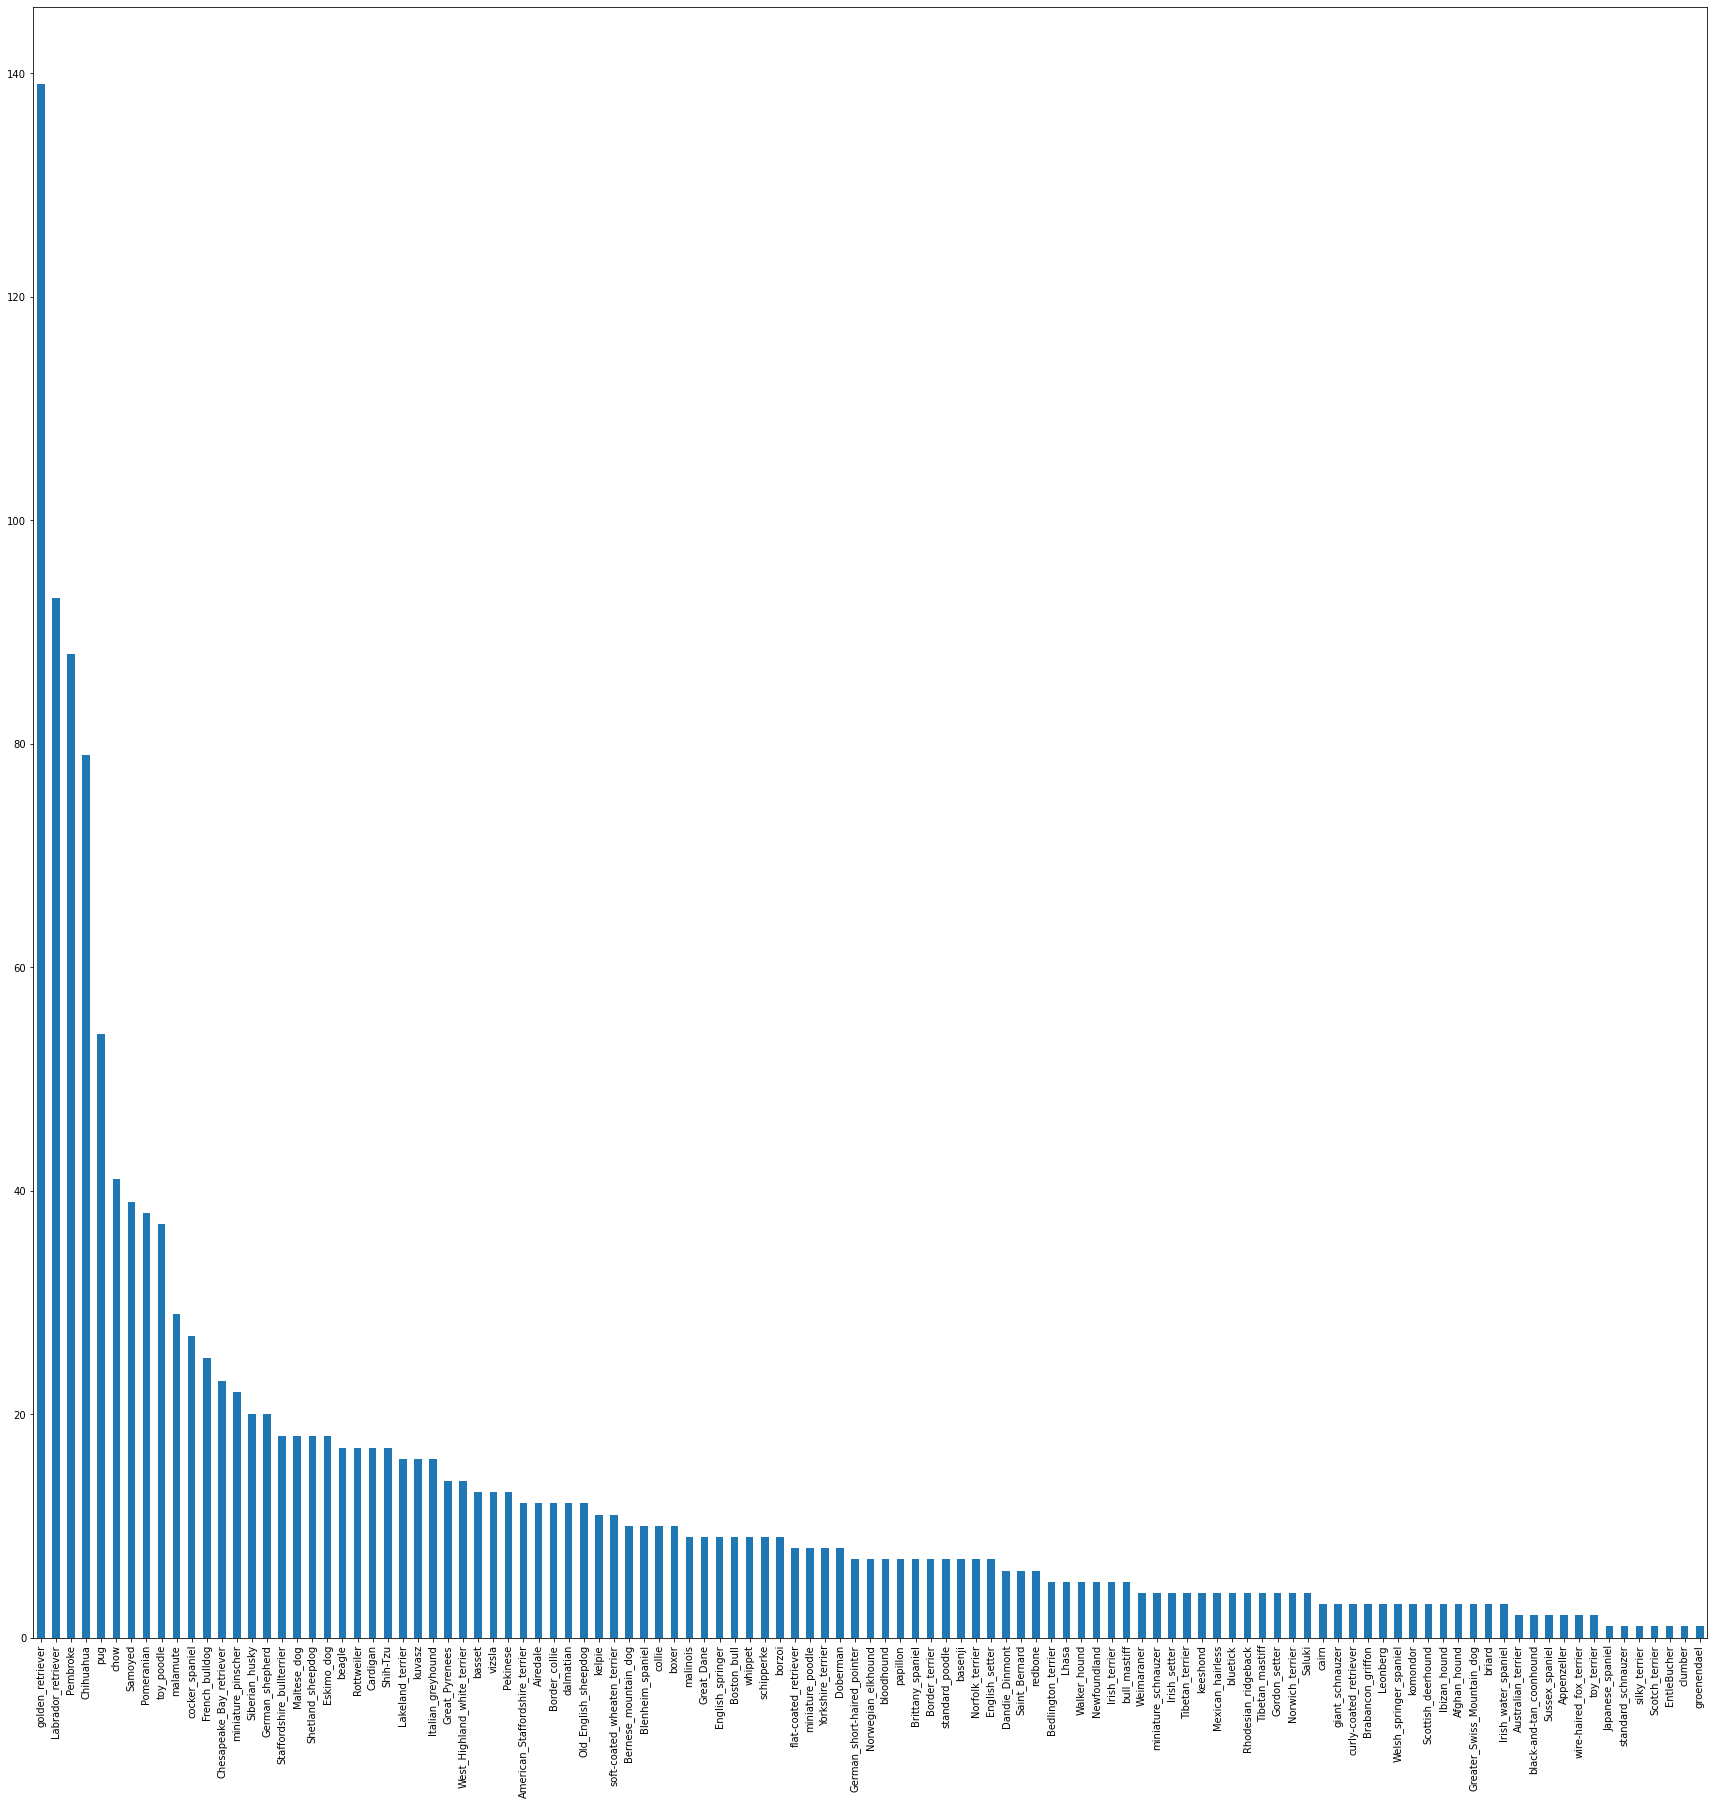

In [292]:
df_master["p1"].value_counts().plot(kind="bar", figsize=(30, 30));

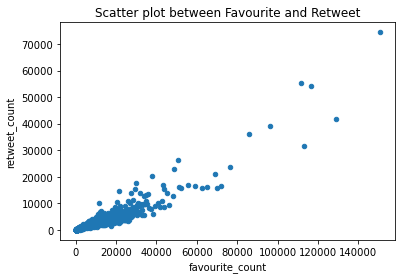

In [293]:
# I want to see if there is a correlation between Favourite and retweet.
df_master.plot.scatter(x = 'favourite_count', y = 'retweet_count', title= "Scatter plot between Favourite and Retweet")

In [294]:
df_master[df_master.favourite_count == 150688]

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favourite_count
611,744234799360020481,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744234799360020481/video/1,13.0,10,...,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,74377,150688


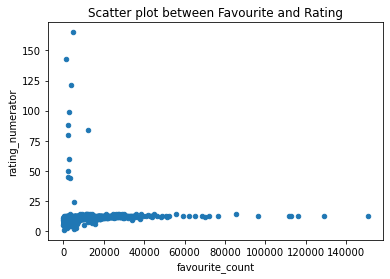

In [295]:
# I want to see if there is a correlation between Favourite and the rating that the owner gave.
df_master.plot.scatter(x = 'favourite_count', y = 'rating_numerator', title= "Scatter plot between Favourite and Rating")

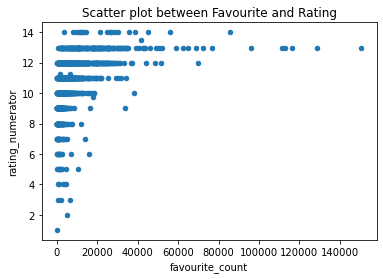

In [296]:
# I'm going to filter the higher ratings values to see more clearly the relationship.
df_master_filter = df_master[df_master['rating_numerator'] < 15]
df_master_filter.plot.scatter(x = 'favourite_count', y = 'rating_numerator', title= "Scatter plot between Favourite and Rating")

### Insights

1) There are 14 breeds that make the 50% of the total tweets, the top 5 most common dogs are Golden retriever, Labrador retriever, Pembroke, Chihuahua and Pug. But common dogs doesn´t mean that there are the favourites, neither of this breeds are in the top 18 of most favourites tweets. 

2) There is a positive relation between favourite and retweet counts, it makes sence that this two indicators move along. It´s important to say that we have "popular" tweets that are way above the average, for example the top 1 it's a labrador swimming in the pool.

3) There is also a relation between the rating that the owners give and the favourite counts, higher numerators also have higher popularity. You know that your dog is doing something special.
